<a href="https://colab.research.google.com/github/riyafang/recieptprinttemplate/blob/master/ECON430_Prj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -u -p /usr/local

--2024-10-21 02:42:52--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148981743 (142M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 142.08M   162MB/s    in 0.9s    

2024-10-21 02:42:53 (162 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [148981743/148981743]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPA

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


In [ ]:
!conda create --name myenv python=3.8 -y

Channels:
 - defaults
Platform: linux-64
Solving environment: / done

## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.8


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.9.24  |       h06a4308_0         130 KB
    ld_impl_linux-64-2.40      |       h12ee557_0         710 KB
    openssl-3.0.15             |       h5eee18b_0         5.2 MB
    pip-24.2                   |   py38h06a4308_0         2.2 MB
    python-3.8.20              |       he870216_0        23.8 MB
    setuptools-75.1.0          |   py38h06a4308_0         1.7 MB
    wheel-0.44.0               |   py38h06a4308_0         108 KB
    ------------------------------------------------------------
                                           Total:        33.8 MB

The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64:

In [ ]:
!source activate myenv

In [ ]:
!conda install numpy pandas scipy pandas matplotlib seaborn statsmodels scikit-learn -y

Channels:
 - defaults
Platform: linux-64
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - matplotlib
    - numpy
    - pandas
    - scikit-learn
    - scipy
    - seaborn
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.7           |  py312ha883a20_0         140 KB
    brotli-1.0.9               |       h5eee18b_8          18 KB
    brotli-bin-1.0.9           |       h5eee18b_8          19 KB
    certifi-2024.8.30          |  py312h06a4308_0         163 KB
    conda-24.9.2               |  py312h06a4308_0         1.1 MB
    contourpy-1.2.0            |  py312hdb19cb5_0         238 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    cyrus-sasl-2.1.28          |       h52b45da_1         237 KB
   

In [ ]:
!pip install mlxtend rpy2 boruta kagglehub

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.8 MB/s eta 0:00:00
  Created wheel for rpy2: filename=rpy2-3.5.16-cp312-cp312-linux_x86_64.whl size=262895 sha256=d1b589dbe3b6898b1dac578afe707661ccd17b124b48231462e1f1a77d12d02e
  Stored in directory: /root/.cache/pip/wheels/1b/7a/26/1d103e01b538d35ccbc2247a5b0f55fcf98a973d032a1282e5
Successfully built rpy2


In [ ]:
!conda env export > environment.yml

/usr/local/lib/python3.12/site-packages/conda/base/context.py:198: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random; random.seed(10) # pre-setting seed
from scipy import stats
from scipy.stats import norm, chi2, f
# Numpy version matters for scipy

# For model fitting
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.graphics import regressionplots
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_reset
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Subset regressions & feature selection
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Boruta
from sklearn.ensemble import RandomForestRegressor
# from boruta import BorutaPy
# from boruta_shap import BorutaShap # use .py file version

# Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt

# Missing data imputation
from sklearn.impute import KNNImputer
from statsmodels.imputation import mice


# For R kernel
# Note: need working copy of R, initiate chunk with `%%R`
import rpy2.ipython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

100%|██████████| 93.9k/93.9k [00:00<00:00, 32.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/6


In [ ]:
data_file = path + "/StudentPerformanceFactors.csv"

# Descriptive Analysis

In [ ]:
data = pd.read_csv(data_file)
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000




## Pre-analysis data cleaning process
1. We mapped ordinal data to numeric values `1/2/3`:  
  -	"Low"/"Medium"/"High" → 1/2/3
  - "High School"/"College"/"Postgraduate" → 1/2/3
  - "Far"/"Moderate"/"Near" → 1/2/3
2.	We converted binary categorical data to numeric values `0/1`:
	-	"Positive"/"Negative" → 1/0
	-	"Male"/"Female" → 1/0
	-	"Yes"/"No" → 1/0
	-	"Private"/"Public" → 1/0
3.	We mapped trinary data to numeric values `1/0/-1`:
	-	"Positive"/"Neutral"/"Negative" → 1/0/-1


In [ ]:
data['Parental_Involvement'] = data['Parental_Involvement'].replace({'Low': 1, 'Medium': 2, 'High': 3})
data['Access_to_Resources'] = data['Access_to_Resources'].replace({'Low': 1, 'Medium': 2, 'High': 3})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].replace({'Yes': 1, 'No': 0})
data['Motivation_Level'] = data['Motivation_Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})
data['Internet_Access'] = data['Internet_Access'].replace({'Yes': 1, 'No': 0})
data['Family_Income'] = data['Family_Income'].replace({'Low': 1, 'Medium': 2, 'High': 3})
data['Teacher_Quality'] = data['Teacher_Quality'].replace({'Low': 1, 'Medium': 2, 'High': 3})
data['School_Type'] = data['School_Type'].replace({'Private': 1, 'Public': 0})
data['Peer_Influence'] = data['Peer_Influence'].replace({'Negative': -1, 'Neutral': 0, 'Positive': 1})
data['Learning_Disabilities'] = data['Learning_Disabilities'].replace({'Yes': 1, 'No': 0})
data['Parental_Education_Level'] = data['Parental_Education_Level'].replace({'High School': 1, 'College': 2, 'Postgraduate': 3})
data['Distance_from_Home'] = data['Distance_from_Home'].replace({'Far': 1, 'Moderate': 2, 'Near': 3})
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})



## 1. Histogram

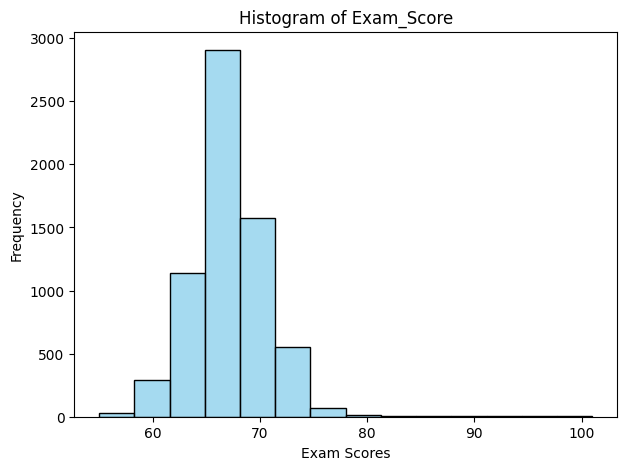

In [ ]:
sturges_bins = int(np.ceil(1 + np.log2(len(data['Exam_Score']))))

plt.figure(figsize=(7, 5))
sns.histplot(data['Exam_Score'], bins=sturges_bins, kde=False, color='skyblue')

plt.title("Histogram of Exam_Score")
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')

plt.show()

## 2.  Quantile Plots

## 3.  Correlation Plots

## Pandas Profiling

# Variable Selection

# Model Building